In [1]:
import json
import numpy as np
import os
import math
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def get_bbox(curr_scene, next_scene):
    pick_bbox = np.zeros((4,))
    place_bbox = np.zeros((4,))
    for idx, obj in enumerate(curr_scene['objects']):
        pixel_pos = obj['pixel_coords']
        cart_pos = obj['3d_coords']
        rotation = obj['rotation']
        
        if next_scene['objects'][idx]['pixel_coords'] != pixel_pos:
            rotation = np.deg2rad(np.rad2deg(rotation) % 90)
            bs_1 = max(abs(np.sin(np.pi/4-rotation)), abs(np.cos(np.pi/4-rotation))) * np.sqrt(2) * bs_2
                
            next_pixel_pos = next_scene['objects'][idx]['pixel_coords']
            next_coord_pos = next_scene['objects'][idx]['3d_coords']

            pick_bbox = np.array([pixel_pos[0]-bs_1//2, pixel_pos[1]-bs_1//2, 
                                  pixel_pos[0]+bs_1//2, pixel_pos[1]+bs_1//2]).astype(int)
            
            if next_scene['objects'][idx]['3d_coords'][2] == 0.5:
                place_bbox = np.array([next_pixel_pos[0]-bs_2//2, next_pixel_pos[1]-bs_2//2, 
                                       next_pixel_pos[0]+bs_2//2, next_pixel_pos[1]+bs_2//2])
            else:
                stack_pos = np.asarray([np.asarray(o['pixel_coords']) \
                                         for o in curr_scene['objects'] \
                                         if o != obj and \
                                         abs(o['3d_coords'][0]-next_coord_pos[0])<0.0001 and 
                                         abs(o['3d_coords'][1]-next_coord_pos[1])<0.0001 and
                                         abs(o['3d_coords'][2]-next_coord_pos[2])==1])[0]
                place_bbox = np.array([stack_pos[0]-bs_2//2, stack_pos[1]-bs_2//2, 
                                       stack_pos[0]+bs_2//2, stack_pos[1]+bs_2//2]).astype(int)
            
    return pick_bbox, place_bbox

[183 148 221 186] [112  38 144  70]


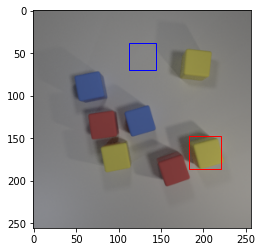

[ 51  73  87 109] [ 81  38 113  70]


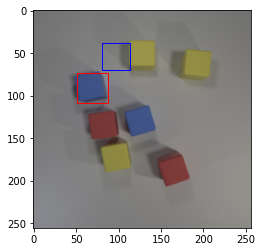

[ 80 153 116 189] [112  38 144  70]


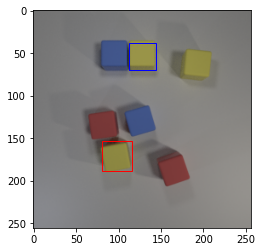

[107 111 145 149] [112  70 144 102]


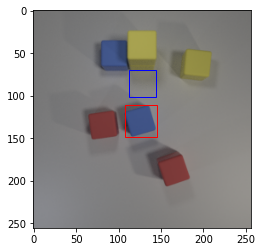

[0. 0. 0. 0.] [0. 0. 0. 0.]


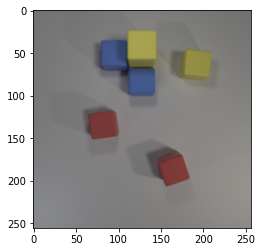

In [8]:
bs_2 = 32
length = 5
for i in range(length):
    test_img = './clevr-dataset-gen/output/images/rubber_5/bird{:06}.png'.format(i)
    curr_scene_fp = './clevr-dataset-gen/output/scenes/rubber_5/HISTORY_birdview_{:06}.json'.format(i)
    next_scene_fp = './clevr-dataset-gen/output/scenes/rubber_5/HISTORY_birdview_{:06}.json'.format(i+1)

    curr_scene = json.load(open(curr_scene_fp, 'r'))
    
    if i == length-1:
        next_scene = curr_scene
    else:
        next_scene = json.load(open(next_scene_fp, 'r'))    
    
    fig, ax = plt.subplots()
    ax.imshow(plt.imread(test_img))
    pick_bbox, place_bbox = get_bbox(curr_scene, next_scene)
    
    rect = patches.Rectangle((pick_bbox[0], pick_bbox[1]), 
                              pick_bbox[2]-pick_bbox[0], pick_bbox[3]-pick_bbox[1], edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    rect = patches.Rectangle((place_bbox[0], place_bbox[1]), 
                              place_bbox[2]-place_bbox[0], place_bbox[3]-place_bbox[1], edgecolor='b', facecolor='none')

    ax.add_patch(rect)
     
    print(pick_bbox, place_bbox)

    plt.pause(0.1)
    prev_scene = curr_scene